In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import SGD

In [5]:
(x_treino,y_treino),(x_teste,y_teste) = mnist.load_data()


11493376/11490434 [==============================] - 2s 0us/step


In [8]:
x_treino.shape, x_teste.shape

((60000, 28, 28), (10000, 28, 28))

In [10]:
x_treino_reshape = x_treino.reshape(60000,28*28)
x_teste_reshape = x_teste.reshape(10000,28*28)

In [13]:
x_treino_transformado = x_treino_reshape.astype(float)/255
x_teste_transformado = x_teste_reshape.astype(float)/255


In [14]:
x_teste_transformado.shape

(10000, 784)

In [15]:
y_treino_np_utils = np_utils.to_categorical(y_treino) 
y_teste_np_utils = np_utils.to_categorical(y_teste)

In [17]:
y_treino_np_utils.shape

(60000, 10)

In [57]:
model = Sequential()
model.add(Dense(30,input_dim=784,kernel_initializer='normal', activation='relu'))
model.add(Dense(30,kernel_initializer='normal', activation='relu'))
model.add(Dense(10,kernel_initializer='normal', activation='softmax'))

In [58]:
model.compile(SGD(),'categorical_crossentropy',['acc'])

In [59]:
historico = model.fit(x_treino_transformado,y_treino_np_utils,batch_size=100,epochs=200,verbose=1,validation_data=(x_teste_transformado,y_teste_np_utils))

Epoch 1/200
600/600 [==============================] - 0s 745us/step - loss: 2.2919 - acc: 0.2083 - val_loss: 2.2742 - val_acc: 0.2912
Epoch 2/200
600/600 [==============================] - 0s 605us/step - loss: 2.1851 - acc: 0.3074 - val_loss: 1.9941 - val_acc: 0.3808
Epoch 3/200
600/600 [==============================] - 0s 662us/step - loss: 1.5093 - acc: 0.5766 - val_loss: 0.9580 - val_acc: 0.7479
Epoch 4/200
600/600 [==============================] - 0s 586us/step - loss: 0.7816 - acc: 0.7726 - val_loss: 0.6437 - val_acc: 0.8079
Epoch 5/200
600/600 [==============================] - 0s 696us/step - loss: 0.6059 - acc: 0.8197 - val_loss: 0.5404 - val_acc: 0.8370
Epoch 6/200
600/600 [==============================] - 0s 641us/step - loss: 0.5203 - acc: 0.8461 - val_loss: 0.4728 - val_acc: 0.8587
Epoch 7/200
600/600 [==============================] - 0s 600us/step - loss: 0.4648 - acc: 0.8650 - val_loss: 0.4273 - val_acc: 0.8739
Epoch 8/200
600/600 [==============================] - 

In [42]:
historico.history.values()

dict_values([[0.35403916239738464, 0.34178054332733154, 0.3304528295993805, 0.32020679116249084, 0.31084755063056946, 0.30145299434661865, 0.29238203167915344, 0.2837512791156769, 0.2755240499973297, 0.2674080729484558, 0.2599126696586609, 0.25247329473495483, 0.24579212069511414, 0.2395755499601364, 0.2338336855173111, 0.22829149663448334, 0.22311553359031677, 0.2180616855621338, 0.21393825113773346, 0.20957407355308533, 0.20543275773525238, 0.20185931026935577, 0.19780081510543823, 0.19409297406673431, 0.19100122153759003, 0.18755744397640228, 0.18425773084163666, 0.1813821792602539, 0.17808343470096588, 0.17524228990077972, 0.1724659502506256, 0.16966797411441803, 0.16682425141334534, 0.16420501470565796, 0.16144660115242004, 0.1595369279384613, 0.15676935017108917, 0.15470202267169952, 0.15240967273712158, 0.1501436084508896], [0.9001166820526123, 0.9038333296775818, 0.9063833355903625, 0.9088833332061768, 0.9118166565895081, 0.9140666723251343, 0.9169999957084656, 0.91946667432785

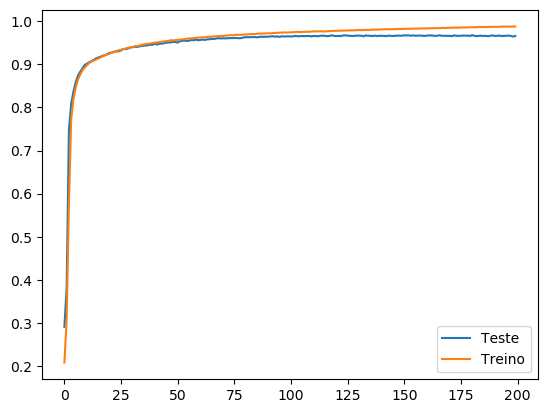

In [60]:
plt.plot(historico.history['val_acc'], label='Teste')
plt.plot(historico.history['acc'], label='Treino')
plt.legend()